# Support Vector Machines
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

En este notebook tomaremos como referencia el material del brillante Aurelien Geron resumido por Akranz.

SVM es un conjunto de algoritmos de aprendizaje supervisado potente y versátil que es capaz de realizar clasificación, regresión e incluso detección de valores atípicos.

Los SVM son particularmente adecuados para conjuntos de datos complejos de tamaño pequeño a mediano. En este notebook se explicarán los conceptos básicos de los SVM, cómo funcionan y cómo usarlos.

Principales características de los SVM:
* Es un algoritmo de clasificación binario. Dado un conjunto de puntos de 2 tipos en el lugar N dimensional, SVM genera un hiperplano (N-1) dimensional que separa esos puntos en 2 grupos.
* Busca el hiperplano que mejor divide el dataset.
* Permite encontrar condiciones de clasificación no obvias.
* Está especialmente indicado en conjuntos de datos pequeños y con muchas variables (más registros que datos).


## 1. Clasificación Lineal con SVM

La idea fundamental detrás de los SVM se explica mejor con la siguiente imagen:

<div style="text-align:center;"><img style="width:66%" src="./img/SVM_example.png" /></div>

Podemos ver que las dos clases se pueden separar fácilmente por una línea recta (linealmente separable).

El gráfico de la izquierda muestra los límites de decisión de tres posibles clasificadores lineales. El modelo de línea discontinua es tan malo que ni siquiera separa los dos grupos linealmente. Los otros dos modelos funcionan perfectamente en el conjunto de entrenamiento gráfico, pero sus límites están tan cerca de los puntos de datos de entrenamiento que probablemente no funcionarán bien en datos no vistos con anterioridad.

Por el contrario, el modelo de la derecha no solo separa los datos de entrenamiento linealmente, sino que también se mantiene lo más alejado posible de los puntos de datos de ambas clases. Por lo tanto, es probable que funcione bien en datos no vistos.

Podemos pensar en un SVM como si encajara en la calle más ancha posible (representada por las líneas discontinuas) entre las clases. Esto se llama **Clasificación de margen máximo (Large Margin Classification)**.

En ese concepto de "separación óptima" es donde reside la característica fundamental de las SVM: este tipo de algoritmos buscan el hiperplano que tenga la máxima distancia (margen) con los puntos que estén más cerca de él mismo. Por eso también a veces se les conoce a las SVM como clasificadores de margen máximo. De esta forma, los puntos del vector que son etiquetados con una categoría estarán a un lado del hiperplano y los casos que se encuentren en la otra categoría estarán al otro lado.

Existe un número infinito de posibles hiperplanos (líneas) que realicen la clasificación pero, ¿cuál es la mejor y cómo la definimos? La mejor solución es aquella que permita un margen máximo entre los elementos de las dos categorías.

Debemos notar que **agregar más puntos de entrenamiento fuera de la calle no afectará en absoluto el límite de decisión**, ya que está completamente determinado por los puntos de datos ubicados en el borde de la calle. Estas instancias se denominan **vectores de soporte**.

Los SVM también son sensibles a las escalas de las características. **Si las features no están escaladas, el algoritmo tenderá a ignorar las features con escalas pequeñas**.

### 1.1. Clasificación de Margen Suave (Soft Margin Classification) para solucionar los errores de entrenamiento

Idealmente, el modelo basado en SVM debería producir un hiperplano que separe completamente los datos del universo estudiado en dos categorías. Sin embargo, una separación perfecta no siempre es posible y, si lo es, el resultado del modelo no puede ser generalizado para otros datos. Esto se conoce como sobreajuste (overfitting).

Si restringimos todas las instancias de entrenamiento para que estén fuera de la "calle SVM", esto se denomina Clasificación de margen rígido (Hard Margin Classification). La clasificación de margen rígido se ve muy afectada por la presencia de outliers (valores atípicos). Los siguientes son dos ejemplos de cómo los outliers pueden estropear los clasificadores de margen rígido:

<div style="text-align:center;"><img style="width:66%;" src="./img/Hard_Margin_Classifier.png" /></div>

Con el fin de permitir cierta flexibilidad, las SVM manejan un parámetro C que controla la compensación entre errores de entrenamiento y los márgenes rígidos, creando así un margen blando (soft margin) que permita algunos errores en la clasificación a la vez que los penaliza. Esto se llama **Clasificación de margen suave**.

<div style="text-align:center;"><img style="width:66%;" src="./img/Soft_to_Hard_Street.png" /></div>

Al aumentar el hiperparámetro `C`, aumentamos la sensibilidad del modelo para minimizar las infracciones de margen dentro del conjunto de entrenamiento. Es decir, si estamos sobreajustando, tratamos de reducir el valor del hiperparámetro `C`.

Vamos a ver los SVM de scikit-learn:

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC  #Linear Support Vector Classification

In [2]:
iris = datasets.load_iris()

In [3]:
iris['data'].shape

(150, 4)

In [4]:
# Seleccionamos las características de la longitud y anchura del pétalo
X = iris['data'][:, [2,3]]  # Petal Length, Petal Width

# Buscamos clasificar si la planta es del tipo Iris Virginica (1) o no (0) 
y = (iris['target'] == 2).astype(np.float64)  # Iris Virginica
X.shape, y.shape

((150, 2), (150,))

Creamos un pipelines con los procesos que vamos a emplear: Escalado y clasificador SVC

In [5]:
svm_clf = Pipeline([
    ('Scaler', StandardScaler()),
    ('Linear_svc', LinearSVC(C=1, loss='hinge'))
])

Entrenamos el modelo con el parámetro C=1

In [6]:
svm_clf.fit(X, y)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Linear_svc', LinearSVC(C=1, loss='hinge'))])

Realizamos la predicción

In [7]:
svm_clf.predict([[5.5, 1.7], [2.0, 1.8]])

array([1., 0.])

A diferencia de los modelos de regresión logística (con sus funciones sigmoideas), los SVM no generan probabilidades para cada clase.

## 2. Clasificación no Lineal con SVM

Muchos datasets ni siquiera están cerca de ser separables linealmente. Un enfoque para manejar el modelado no lineal es agregar más características, como características polinómicas.
En algunos casos, esto puede resultar en datasets linealmente separables.

![SVM](./img/img.png)

El siguiente es un ejemplo de un conjunto de datos separable no linealmente original con una sola característica $x_{1}$ (a la izquierda) y un conjunto de datos separable linealmente aumentado con una característica adicional $x_{2}=x_{1}^{2}$ :

<div style="text-align:center;"><img style="width:66%;" src="./img/nonlinear_to_linear.png" /></div>

Veamos a continuación como implementar esta idea usando scikit-learn con el dataset moons. Este dataset está formado por conjuntos de puntos (cuyo número es configurable, en este caso, será de 100) dispuestos en el plano formando dos lunas opuestas::

/home/a22mariobs/anaconda3/envs/ml_env_linux/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


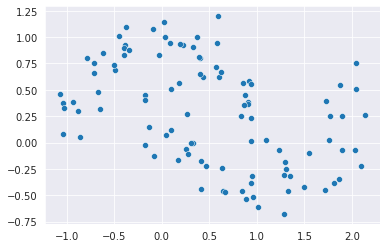

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15)
import seaborn as sns
Cx = X[:, 0]
Cy = X[:, 1]
sns.scatterplot(Cx,Cy);

In [9]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

In [10]:
polynomial_svm_clf.fit(X, y)

/home/a22mariobs/anaconda3/envs/ml_env_linux/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [11]:
polynomial_svm_clf.score(X, y)

1.0

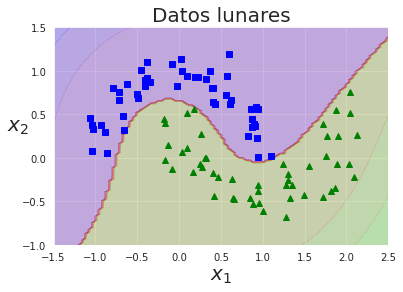

In [12]:
import matplotlib.pyplot as plt
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs") #bs: blue squares
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^") #green triangles
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.title("Datos lunares",fontsize=20)
def plot_predictions(clf, axes):
    # Por metro
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    #     print(y_pred)
    #     print(y_decision)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()


El siguiente gráfico muestra los límites de decisión del modelo. Debido a que agregamos grados polinómicos, los límites proyectados ahora son no lineales:

<div style="text-align:center;"><img style="width:50%;" src="./img/polynomial_svms.png" /></div>

### 2.1. Kernels Polinómicos

En grados polinómicos bajos, agregar características no permite manejar conjuntos de datos complejos, y para grados polinómicos altos, terminamos agregando muchas características, lo que da como resultado un modelo muy complejo y lento.

Afortunadamente, cuando usamos SVM podemos aplicar una técnica matemática casi milagrosa llamada **truco del kernel**. El truco del kernel hace posible obtener el mismo resultado que si añadiéramos muchas características polinomiales sin añadirlas realmente.

Vamos a probarlo en el dataset moons:

In [13]:
from sklearn.svm  import SVC


In [14]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=300, noise=0.15)

In [15]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

In [16]:
poly_kernel_svm_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

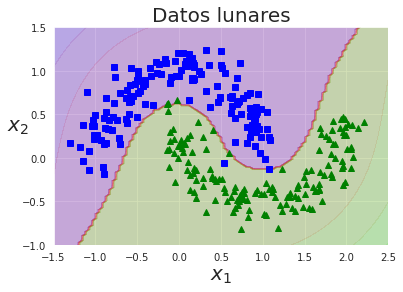

In [17]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Este modelo entrena un clasificador SVM utilizando un kernel de features de tercer grado.

Si nuestro modelo se ajusta en exceso, es posible que deseemos disminuir el grado del polinomio, y si se ajusta de manera insuficiente, puede ser una buena idea aumentar el grado. `coef0` (r) controla en qué porcentaje el modelo está influenciado por polinomios de alto grado frente a polinomios de bajo grado.

La siguiente figura muestra el modelo previamente entrenado de grado 3 (a la izquierda) frente a un modelo más complejo de kernel de grado 10:

<div style="text-align:center;"><img style="width:66%;" src="./img/kernel_trick.png" /></div>

## 3. Regresión SVM

Las SVM también admiten la regresión lineal y no lineal, pero para pasar de la clasificación a la regresión tenemos que invertir el objetivo. En lugar de intentar encajar la calle más grande posible entre dos clases mientras se limitan las infracciones de margen, la regresión SVM intenta encajar **tantas instancias como sea posible** en la calle mientras limita las infracciones de margen. El ancho de la calle está controlado por el hiperparámetro $\epsilon$. A continuación se muestra un ejemplo:



<div style="text-align:center;"><img style="width:66%;" src="./img/SVM_regression.png" /></div>

Agregar más instancias al margen no afecta las predicciones del modelo; por lo tanto, se dice que el modelo es $\epsilon$-insensible.

Vamos a implementar un regresor lineal `SVR` de `sklearn` (después de escalar y centrar los datos):

In [18]:
from sklearn.svm import LinearSVR

In [19]:
svm_reg = LinearSVR(epsilon=1.5)

In [20]:
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

Para abordar las tareas de regresión lineal, podemos usar un modelo SVM con kernel polinomial:


In [21]:
from sklearn.svm import SVR

In [22]:
svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='auto')

In [23]:
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, gamma='auto', kernel='poly')

`LinearSVR` se escala linealmente al tamaño del conjunto de entrenamiento, mientras que `SVR` es mucho más lento (al igual que `LinearSVC` y `SVC`).

## 4. EXTRA: Similarity Features

Al margen de los kernels polinómicos, existe otra técnicas habitual para abordar problemas no lineales llamada "Similarity features" consistente en agregar características calculadas usando una **función de similitud**, que mide cuánto se parece cada instancia a un punto de referencia en particular.

Por ejemplo, si tomamos el dataset visto anteriormente y agregamos dos puntos de referencia en $x_{1}=-2$ y $x_{1}=1$, como se muestra en el gráfico izquierdo de:

<div style="text-align:center;"><img style="width:66%;" src="./img/similarity_measures.png" /></div>

Definimos la función de similitud como la **Función de base radial gaussiana (RBF)** con $\gamma = 0.3$. $\phi$ es una función en forma de campana que varía de 0 ($x$ está muy lejos de $l$) a 1 ($x=l$). Después de definir una función de similitud, las nuevas características son las **distancias** de cada instancia de entrenamiento desde los puntos de referencia.

Como podemos ver en el gráfico de la derecha, las instancias se vuelven linealmente separables usando solo características de distancia.

Pero, ¿cómo seleccionamos los puntos de referencia? El enfoque más simple es crear un punto de referencia en todos y cada uno de los puntos de los datos de entrenamiento. Hacer eso aumentará el número de dimensiones y dará una mejor oportunidad de encontrar un separador lineal. La desventaja es que crearemos un número `m` adicional de funciones (como filas), lo que puede provocar problemas de rendimiento.

### 4.1. Gaussian RBF Kernel

Al igual que el método de características polinómicas, el método de características de similitud puede ser útil en muchos algoritmos de ML. El problema es que con conjuntos de datos muy grandes, terminaremos con un espacio de características muy grande, pero una vez más tenemos el truco de Kernel para que parezca como si añadimos características adicionales.

Vamos a verlo con `sklearn`:

In [24]:
from sklearn.svm import SVC

In [25]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

In [26]:
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

A continuación tenemos el espacio de predicciones con las instancias del conjunto de entrenamiento (abajo a la izquierda está el modelo entrenado anteriormente). Los otros gráficos se corresponden a diferentes configuraciones de hiperparámetros:

<div style="text-align:center;"><img style="width:66%;" src="./img/training_rbfs.png" /></div>

El aumento de $\gamma$ hace que la curva en forma de campana sea más estrecha, el límite de decisión termina siendo más irregular, moviéndose alrededor de instancias individuales. Entonces $\gamma$ actúa como un hiperparámetro de regularización.
- El aumento de gamma aumenta la sensibilidad del modelo (puede dar lugar a un sobreajuste).
- la disminución de gamma aumenta el sesgo del modelo (puede conducir a un ajuste insuficiente)

Siempre deberíamos probar primero el kernel lineal, y si el conjunto de entrenamiento no es demasiado grande, entonces podríamos probar el kernel RBF gaussiano.

## Ejercicios:

Responde a las siguientes preguntas cortas:

1. ¿Qué es un vector de soporte?

Es un conjunto de algoritmos que se usan para clasificación binaria, es decir para separar un set de datos en dos categorías o clases diferentes (clasificación).

2. ¿Es necesario escalar las features cuando usamos SVM? ¿Por qué?

Para evitar Outliers y que distorsione a la hora de entrenar el modelo ya que se trata de algoritmos de clasificación y cualquier Outlier estropearía nuestro modelo.

3. Supongamos que has entrenado un clasificador SVM con Kernel Polinómicos, pero parece que no se ajusta bien a los datos de entrenamiento. ¿Qué harías?

Probaría con una clasificación lineal con polinomial features,ya que es similiar y si no,probaría con el resto de algorítmos de SVM que más se ajuste a los datos de los que disponemos.

**4. Entrena un clasificador `LinearSVC` sobre un dataset separable lienalmente generado aleatóriamente.**

In [27]:
from sklearn.svm import LinearSVC, SVC
import matplotlib.pyplot as plt

Primero generamos los datos separable linealmente:

In [28]:
d1 = np.concatenate((np.random.normal(loc=6, scale=1, size=(500, 2)), np.ones((500, 1))), axis=1) 
d2 = np.concatenate((np.random.normal(loc=3, scale=1, size=(500, 2)), np.zeros((500, 1))), axis=1) 
d1.shape, d2.shape

((500, 3), (500, 3))

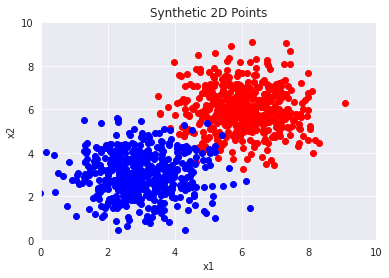

In [29]:
plt.scatter(d1[:,0], d1[:,1], c='red')
plt.scatter(d2[:,0], d2[:,1], c='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Synthetic 2D Points')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

Posteriormente, combinamos y mezclamos los datos d1 y d2:

In [30]:
d = np.concatenate((d1,d2), axis=0)
d.shape

(1000, 3)

In [31]:
np.random.shuffle(d)

Entrenamiento:

In [32]:
model = LinearSVC()

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test =  train_test_split(d[:,:2], d[:,2:], test_size=0.2)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800, 1), (200, 1))

In [36]:
model.fit(X_train, y_train.ravel())

/home/a22mariobs/anaconda3/envs/ml_env_linux/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [37]:
model.score(X_test, y_test)

0.975

Printado de los márgenes de decisión:

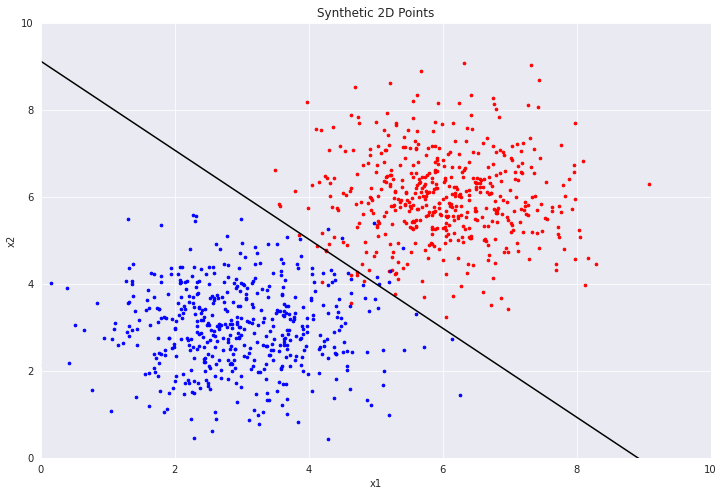

In [38]:
plt.figure(figsize=(12,8))
# Points
plt.scatter(d1[:,0], d1[:,1], c='red', s=7)
plt.scatter(d2[:,0], d2[:,1], c='blue', s=7)
# Decision boundaries
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 10)
yy = a * xx - (model.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')
# Other
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Synthetic 2D Points')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

A continuación, entrenamos un clasificador SVC:

In [39]:
C = .01
svc_clf = SVC(C=C, kernel='linear', degree=1, gamma='auto')

In [40]:
svc_clf.fit(X_train, y_train.ravel())

SVC(C=0.01, degree=1, gamma='auto', kernel='linear')

In [41]:
svc_clf.score(X_test, y_test)

0.97

In [42]:
h = .02 
x_min, x_max = d[:,0].min() - 1, d[:,0].max() + 1
y_min, y_max = d[:,1].min() - 1, d[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [43]:
Z = svc_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

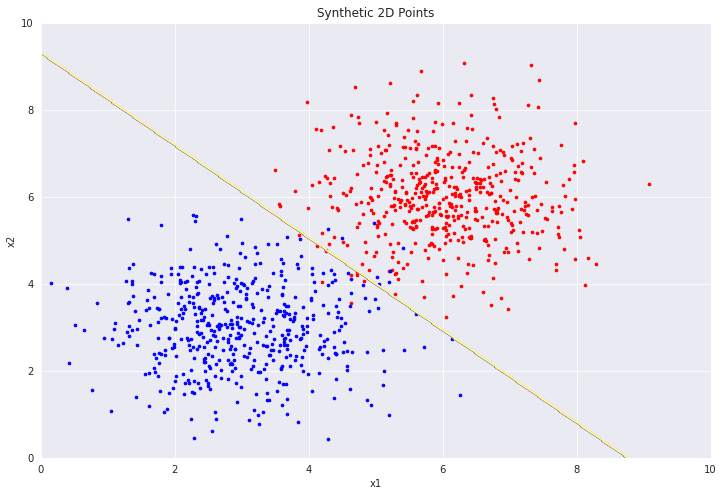

In [44]:
plt.figure(figsize=(12,8))
# Points
plt.scatter(d1[:,0], d1[:,1], c='red', s=7)
plt.scatter(d2[:,0], d2[:,1], c='blue', s=7)
# Decision boundary
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
# Other
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Synthetic 2D Points')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

Explica que diferencias has encontrado entre ambos. ¿Son iguales sus resultados? ¿Podríamos obtener el mismo modelo de ambos?

**5. Entrena un Regresor SVM sobre el dataset de casas de California (California Housing)**

In [45]:
from sklearn.svm import SVR

In [46]:
#X, y = datasets.california_housing.fetch_california_housing(return_X_y=True)
X, y = datasets.fetch_california_housing(return_X_y=True)
X.shape, y.shape

((20640, 8), (20640,))

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33)

In [48]:
from sklearn.preprocessing import StandardScaler

Primero, escalamos los datos, para después entrenar y evaluar los resultados:

In [49]:
scaler = StandardScaler()

In [50]:
X_train = scaler.fit_transform(X_train)

In [51]:
regressor = SVR()

In [52]:
regressor.fit(X_train, y_train)

SVR()

In [53]:
regressor.score(scaler.transform(X_val), y_val)

0.7381512693779926

¿Cómo ha ido el regresor? Muestra gráficamente si todos los puntos se encuentran dentro de los márgenes.

In [54]:
# import matplotlib.pyplot as plt


# plt.scatter(X_val,y_val)
# plt.show()

**EXTRA: Entrena un clasificador SVM en el conjunto de datos MNIST. Dado que los clasificadores SVM son clasificadores binarios, deberás usar uno contra el resto para clasificar los 10 dígitos. Es posible que quieras ajustar los hiperparámetros mediante pequeños conjuntos de validación para acelerar el proceso. ¿Qué precisión puedes alcanzar?
Pista: https://www.kaggle.com/nishan192/mnist-digit-recognition-using-svm**

In [55]:
from sklearn import datasets

In [56]:
X, y = datasets.fetch_openml(name='mnist_784', return_X_y=True)

KeyboardInterrupt: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Usaremos la validación cruzada para optimizar los hiperparámetros:

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
clf = OneVsRestClassifier(estimator=SVC(gamma='auto'))

In [ ]:
scores = cross_val_score(estimator=clf, X=X_train[:1000]/255., y=y_train[:1000], cv=7)

In [ ]:
print(f"We reach an accuracy of {sum(scores)/len(scores)}")

---